In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Standard scaler

In [2]:
df = pd.DataFrame({
    'x1': np.random.normal(0,2,10000),
    'x2': np.random.normal(5,3,10000),
    'x3': np.random.normal(-5,5,10000)
})

In [3]:
df.head()

,x1,x2,x3
0,-1.811318,6.511330,-2.014372
1,-4.093675,6.591040,-5.908028
2,0.828147,2.091001,-6.476919
3,-2.239166,6.206598,-8.346768
4,-0.580588,0.785402,-4.958730


In [4]:
import warnings
warnings.filterwarnings('ignore')

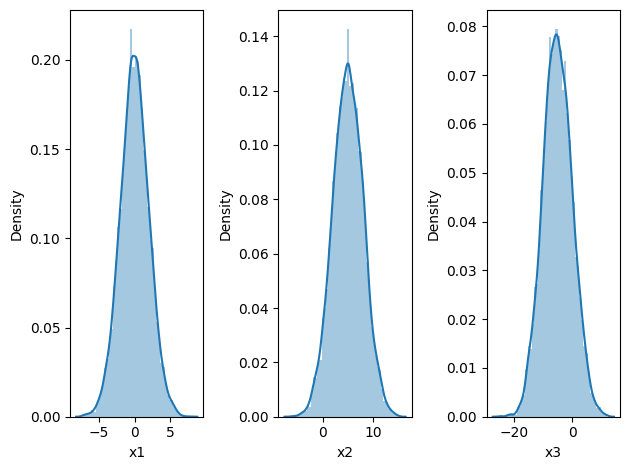

In [5]:
plt.subplot(1,3,1)
sns.distplot(df.x1)
plt.subplot(1,3,2)
sns.distplot(df.x2)
plt.subplot(1,3,3)
sns.distplot(df.x3)
plt.tight_layout()
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data

array([[-0.90110366,  0.49622943,  0.60179878],
       [-2.03720454,  0.5224794 , -0.18077576],
       [ 0.41275711, -0.95947633, -0.29511564],
       ...,
       [ 1.19051995, -2.00185394,  2.93249187],
       [-0.81635748, -1.36524284, -0.00844158],
       [-1.41155634, -0.55784403, -1.52162127]])

In [8]:
scaled_df = pd.DataFrame(scaled_data, columns=df.columns).add_prefix('scaled_')
scaled_df.head()


,scaled_x1,scaled_x2,scaled_x3
0,-0.901104,0.496229,0.601799
1,-2.037205,0.522479,-0.180776
2,0.412757,-0.959476,-0.295116
3,-1.114076,0.395875,-0.670931
4,-0.288476,-1.389437,0.010021


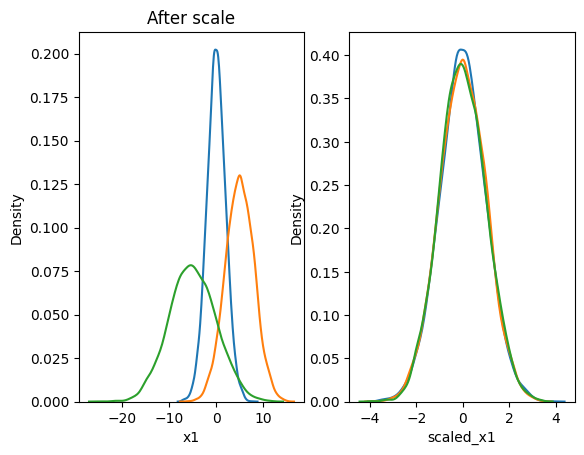

In [9]:
f, (ax1, ax2)  =plt.subplots(1,2)
ax1.set_title('Before scale')
sns.kdeplot(df.x1, ax = ax1)
sns.kdeplot(df.x2, ax = ax1)
sns.kdeplot(df.x3, ax = ax1)
ax1.set_title('After scale')
sns.kdeplot(scaled_df.scaled_x1, ax = ax2)
sns.kdeplot(scaled_df.scaled_x2, ax = ax2)
sns.kdeplot(scaled_df.scaled_x3, ax = ax2)
plt.show()

### Minmax Scaler

In [10]:
df = pd.read_csv('./input_data/Data_for_Values.csv')
df.head()

,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,27,48000,Yes
2,Germany,30,54000,No
3,Spain,38,61000,No
4,Germany,40,45000,Yes


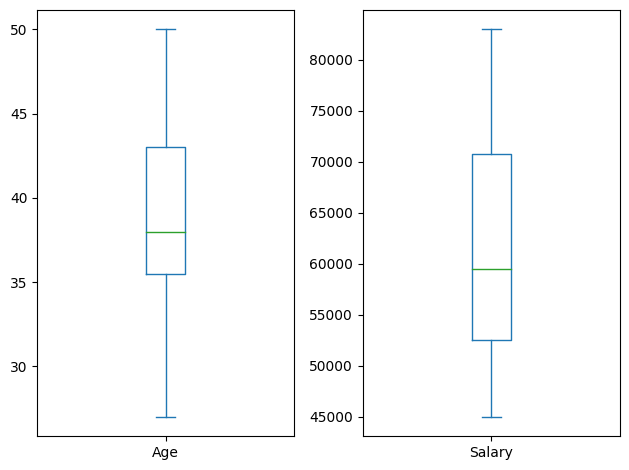

In [11]:
### Before scaling
plt.subplot(1,2,1)
df.Age.plot.box()
plt.subplot(1,2,2)
df.Salary.plot.box()
plt.tight_layout()
plt.show()

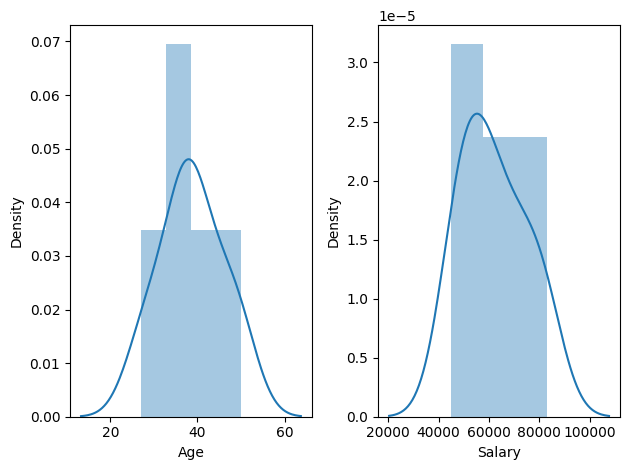

In [12]:
plt.subplot(1,2,1)
sns.distplot(df.Age)
plt.subplot(1,2,2)
sns.distplot(df.Salary)
plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
numeric_cols = df.select_dtypes(exclude='O').columns

In [15]:
scaled_data = MinMaxScaler().fit_transform(df[numeric_cols])
scaled_data

array([[0.73913043, 0.71052632],
       [0.        , 0.07894737],
       [0.13043478, 0.23684211],
       [0.47826087, 0.42105263],
       [0.56521739, 0.        ],
       [0.34782609, 0.34210526],
       [0.47826087, 0.18421053],
       [0.91304348, 0.89473684],
       [1.        , 1.        ],
       [0.43478261, 0.57894737]])

In [16]:
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols).add_prefix('scaled_')
scaled_df

,scaled_Age,scaled_Salary
0,0.739130,0.710526
1,0.000000,0.078947
2,0.130435,0.236842
3,0.478261,0.421053
4,0.565217,0.000000
5,0.347826,0.342105
6,0.478261,0.184211
7,0.913043,0.894737
8,1.000000,1.000000
9,0.434783,0.578947


In [17]:
df = pd.concat([df, scaled_df],axis=1)
df.head()

,Country,Age,Salary,Purchased,scaled_Age,scaled_Salary
0,France,44,72000,No,0.739130,0.710526
1,Spain,27,48000,Yes,0.000000,0.078947
2,Germany,30,54000,No,0.130435,0.236842
3,Spain,38,61000,No,0.478261,0.421053
4,Germany,40,45000,Yes,0.565217,0.000000


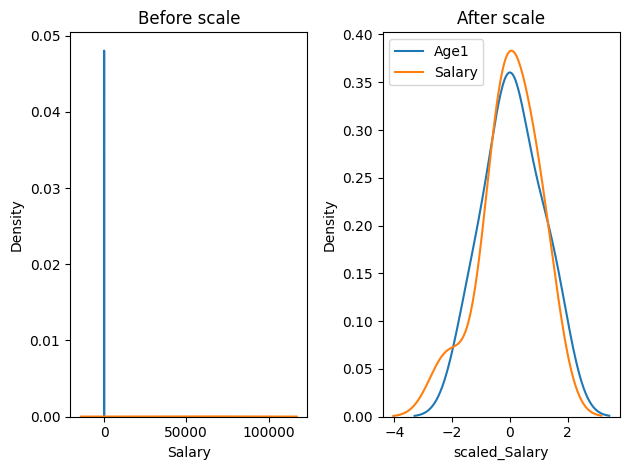

In [42]:
f, (ax1, ax2)  =plt.subplots(1,2)
ax1.set_title('Before scale')
sns.distplot(df.Age, ax = ax1, hist=False, label='Age')
sns.distplot(df.Salary, ax = ax1, hist=False, label='Salary')
ax2.set_title('After scale')
sns.distplot(scaled_df.scaled_Age, ax = ax2, hist=False, label='Age')
sns.distplot(scaled_df.scaled_Salary, ax = ax2, hist=False, label='Salary')
plt.legend()
plt.tight_layout()
plt.show()

### Robust Scaler

In [29]:
df = pd.read_csv('./input_data/Data_for_Values_1.csv')
df.head()

,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,27,48000,Yes
2,Germany,30,54000,No
3,Spain,38,61000,No
4,Germany,40,20000,Yes


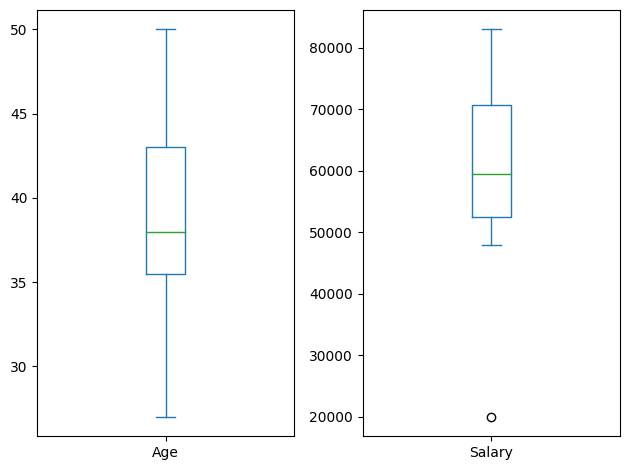

In [30]:
### Before scaling
plt.subplot(1,2,1)
df.Age.plot.box()
plt.subplot(1,2,2)
df.Salary.plot.box()
plt.tight_layout()
plt.show()

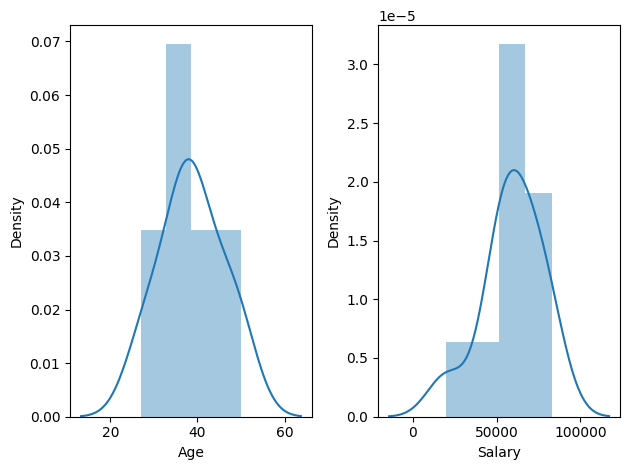

In [32]:
plt.subplot(1,2,1)
sns.distplot(df.Age)
plt.subplot(1,2,2)
sns.distplot(df.Salary)
plt.tight_layout()
plt.show()

In [31]:
from sklearn.preprocessing import RobustScaler

In [34]:
numeric_cols = df.select_dtypes(include=[int,float]).columns
numeric_cols

Index(['Age', 'Salary'], dtype='object')

In [36]:
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])
scaled_data

array([[ 0.8       ,  0.68493151],
       [-1.46666667, -0.63013699],
       [-1.06666667, -0.30136986],
       [ 0.        ,  0.08219178],
       [ 0.26666667, -2.16438356],
       [-0.4       , -0.08219178],
       [ 0.        , -0.4109589 ],
       [ 1.33333333,  1.06849315],
       [ 1.6       ,  1.28767123],
       [-0.13333333,  0.4109589 ]])

In [37]:
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols).add_prefix('scaled_')
scaled_df

,scaled_Age,scaled_Salary
0,0.800000,0.684932
1,-1.466667,-0.630137
2,-1.066667,-0.301370
3,0.000000,0.082192
4,0.266667,-2.164384
5,-0.400000,-0.082192
6,0.000000,-0.410959
7,1.333333,1.068493
8,1.600000,1.287671
9,-0.133333,0.410959


In [38]:
df = pd.concat([df, scaled_df],axis=1)
df.head()

,Country,Age,Salary,Purchased,scaled_Age,scaled_Salary
0,France,44,72000,No,0.800000,0.684932
1,Spain,27,48000,Yes,-1.466667,-0.630137
2,Germany,30,54000,No,-1.066667,-0.301370
3,Spain,38,61000,No,0.000000,0.082192
4,Germany,40,20000,Yes,0.266667,-2.164384


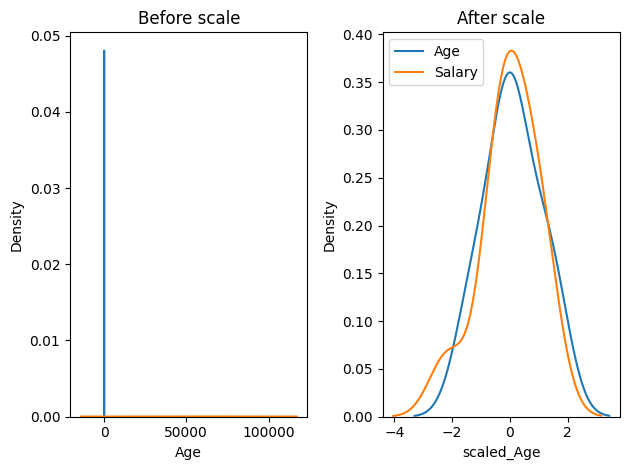

In [46]:
f, (ax1, ax2)  =plt.subplots(1,2)
ax1.set_title('Before scale')
sns.kdeplot(df.Age, ax = ax1, label='Age')
sns.kdeplot(df.Salary, ax = ax1, label='Salary')
ax2.set_title('After scale')
sns.kdeplot(scaled_df.scaled_Age, ax = ax2, label='Age')
sns.kdeplot(scaled_df.scaled_Salary, ax = ax2, label='Salary')
plt.legend()
plt.tight_layout()
plt.show()

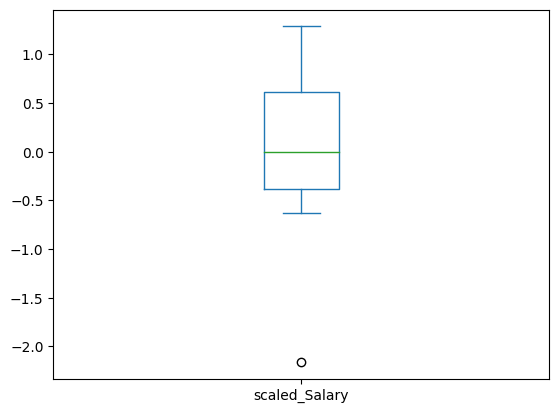

In [48]:
df.scaled_Salary.plot.box()
plt.show()

### Binarizer

In [49]:
Y = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.],
     [ 3. , -2., 1. ]]

In [50]:
from sklearn.preprocessing import Binarizer

In [52]:
transformer = Binarizer()

In [53]:
transformer.fit_transform(Y)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 1.]])

In [54]:
from PIL import Image

In [59]:
image = np.array(Image.open('./input_data/demo_img.jpg').convert('L'))
image

array([[255, 248, 255, ..., 254, 255, 255],
       [244, 254, 235, ..., 255, 255, 255],
       [255, 247,  90, ..., 138, 255, 255],
       ...,
       [255, 244,  98, ..., 101, 255, 255],
       [236, 255, 232, ..., 255, 255, 255],
       [255, 255, 245, ..., 255, 255, 255]], dtype=uint8)

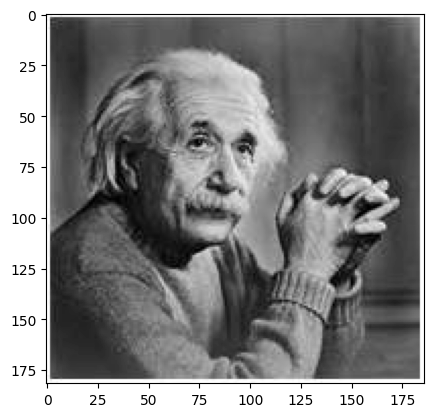

In [60]:
plt.imshow(image, cmap='gray')
plt.show()

In [61]:
transformer = Binarizer(threshold=127)

In [62]:
new_image = transformer.fit_transform(image)

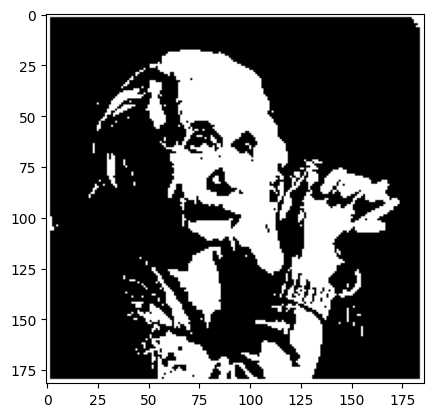

In [63]:
plt.imshow(new_image, cmap='gray')
plt.show()

In [64]:
image.max(), image.min()

(255, 0)